In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable
from numpy.typing import NDArray

In [3]:
# Variables
beta = 24
delta_E = 0.6
mu_E = 0.15
delta_J = 0.08
mu_J = 0.05
alpha = 0.003
omega = 0.5
mu_A = 0.1
t_0 = 0
t_end = 365
h = 0.005
y_0 = np.array([10, 0, 0])

In [4]:
# RK4 Function
def RK4(f:Callable[[float, NDArray], NDArray],
        y_n:NDArray,
        t_n:float,
        h:float
        ) -> NDArray:
    k1 = f(t_n, y_n)
    k2 = f(t_n + 0.5 * h, y_n + 0.5 * h * k1)
    k3 = f(t_n + 0.5 * h, y_n + 0.5 * h * k2)
    k4 = f(t_n + h, y_n + h * k3)

    y_nn = y_n + (h/6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y_nn

# Algorithm 2 (RHS)
def f(t_n:float,
      y_n:NDArray,
      beta:float=beta,
      delta_E:float=delta_E,
      mu_E:float=mu_E,
      delta_J:float=delta_J,
      mu_J:float=mu_J,
      alpha:float=alpha,
      omega:float=omega,
      mu_A:float=mu_A
      ) -> NDArray:

    E = y_n[0]
    J = y_n[1]
    A = y_n[2]

    dE = beta * A - delta_E * E - mu_E * E
    dJ = delta_E * E - delta_J * J - alpha * np.square(J) - mu_J * J
    dA = omega * delta_J * J - mu_A * A

    dy = np.array([dE, dJ, dA])
    return dy

In [5]:
# Creating a vector T where the elements follow the pattern t0 + h(i - 1),
# where `i` denotes the position of the element in T.
T = np.array([t_0 + h * (i - 1) for i in range(1, int(t_end / h) + 2)])
print(f'The first element of the vector T: {T[0]}')
print(f'The last element of the vector T: {T[-1]}')

The first element of the vector T: 0.0
The last element of the vector T: 365.0


In [6]:
# PS: T wasn't used in both functions
Y_nn = np.array([])

for i in range(1, int(t_end/h) + 1):
    # we check if the index is 1 to use y_0
    if i == 1:
        y_nn = RK4(f, y_0, T[i-1], h)
    # else we continue with the last computed value y_(i-1)
    else:
        y_nn = RK4(f, y_nn, T[i-1], h)
    Y_nn = np.append(Y_nn, y_nn)

# reshape it to have the 3 columns (E, J, A)
Y_nn = Y_nn.reshape((73000, 3))

# Add the y_0 at the beginning and save it in the new variable Y
Y = np.vstack((y_0, Y_nn))
Y

array([[1.00000000e+01, 0.00000000e+00, 0.00000000e+00],
       [9.96257034e+00, 2.99340801e-02, 2.99510462e-06],
       [9.92528150e+00, 5.97366413e-02, 1.19608739e-05],
       ...,
       [3.22133278e+04, 2.51666645e+03, 1.00666651e+03],
       [3.22133278e+04, 2.51666645e+03, 1.00666651e+03],
       [3.22133278e+04, 2.51666645e+03, 1.00666651e+03]], shape=(73001, 3))

In [7]:
# Or we can just do it without storing y_nn
Y = np.zeros((len(T), 3))
Y[0] = y_0

for i in range(1, int(t_end/h) + 1):
    Y[i] = RK4(f, Y[i-1], T[i-1], h)

Y

array([[1.00000000e+01, 0.00000000e+00, 0.00000000e+00],
       [9.96257034e+00, 2.99340801e-02, 2.99510462e-06],
       [9.92528150e+00, 5.97366413e-02, 1.19608739e-05],
       ...,
       [3.22133278e+04, 2.51666645e+03, 1.00666651e+03],
       [3.22133278e+04, 2.51666645e+03, 1.00666651e+03],
       [3.22133278e+04, 2.51666645e+03, 1.00666651e+03]], shape=(73001, 3))

In [8]:
Y[:, 0][500]

np.float64(7.354121415069154)

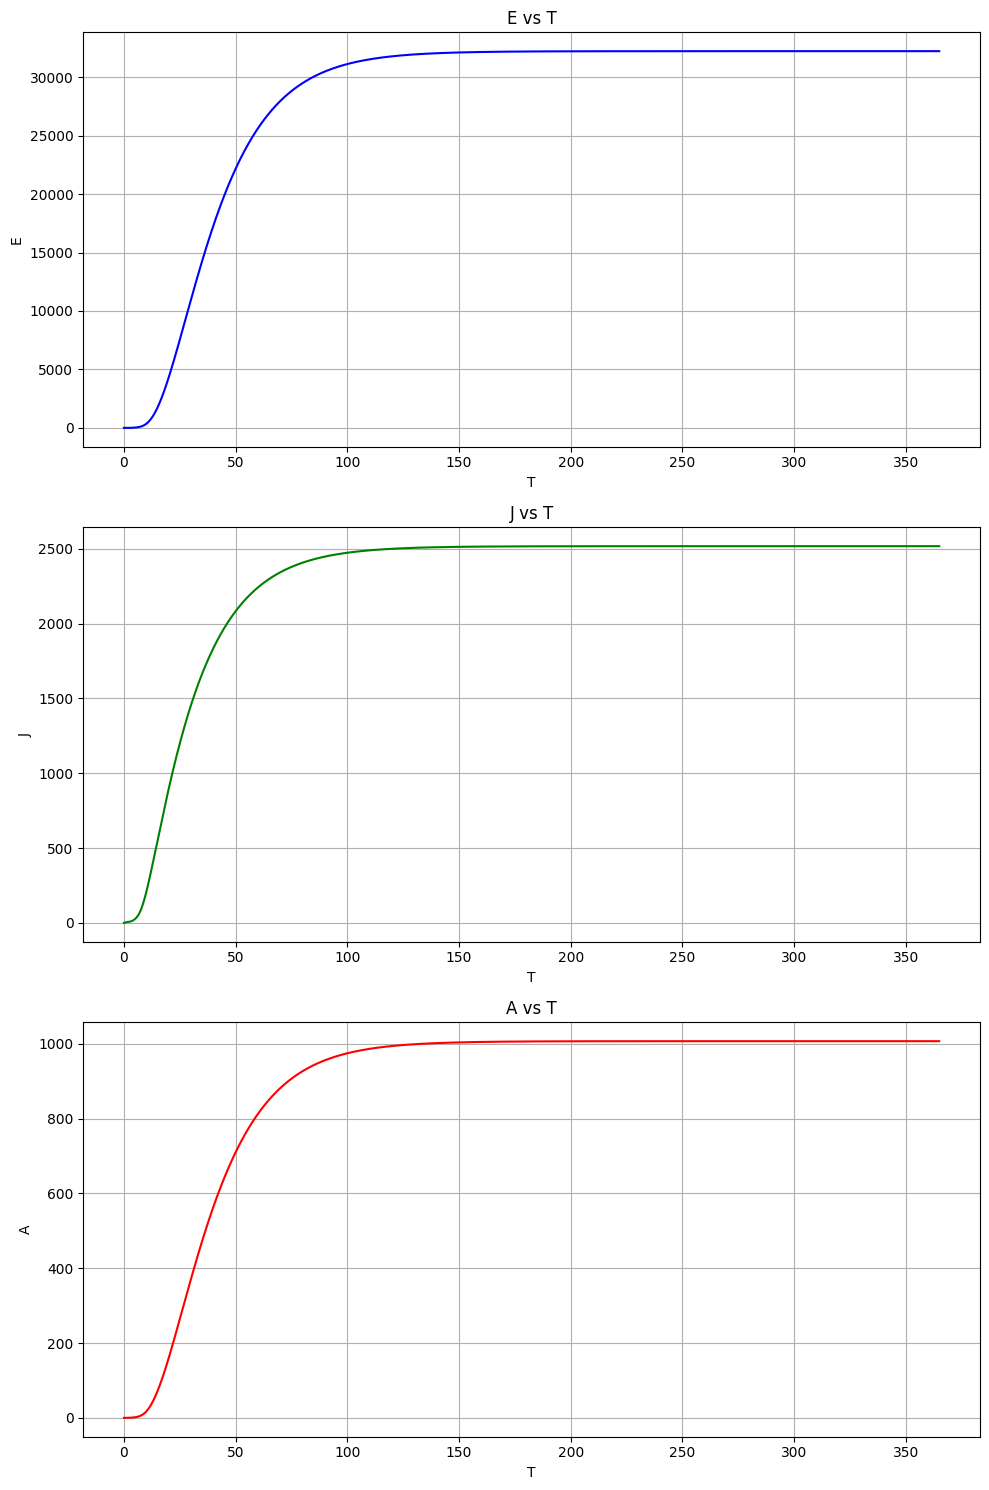

In [9]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# First subplot (E vs T)
axs[0].plot(T, Y[:, 0], label="E", color='b')
axs[0].set_xlabel('T')
axs[0].set_ylabel('E')
axs[0].set_title('E vs T')
axs[0].grid(True)

# Second subplot (J vs T)
axs[1].plot(T, Y[:, 1], label="J", color='g')
axs[1].set_xlabel('T')
axs[1].set_ylabel('J')
axs[1].set_title('J vs T')
axs[1].grid(True)

# Third subplot (A vs T)
axs[2].plot(T, Y[:, 2], label="A", color='r')
axs[2].set_xlabel('T')
axs[2].set_ylabel('A')
axs[2].set_title('A vs T')
axs[2].grid(True)

# Display the plots
plt.tight_layout()
plt.show()